# Project 4: Loan Approval Status

Importing Basic libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading Excel File

In [4]:
data=pd.read_excel("C:/Users/parth/Arjun/Project 4/Project - 4 - Train Data.xlsx")
data

,Loanapp_ID,Sex,Marital_Status,first_name,last_name,email,address,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,INT_ID,Prev_ID,AGT_ID,CPL_Status
0,CPL001002,M,N,Austin,Pennycook,apennycook1@mac.com,007 Miller Road,0,Grad,N,7018.8,0.0,NaN,360.0,1.0,Urban,9694176212,92-247-0058,Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-TW...,Y
1,CPL001003,M,Y,Mareah,Tomanek,mtomanek2@bloomberg.com,145 Charing Cross Junction,1,Grad,N,5499.6,1809.6,153.6,360.0,1.0,Rural,152387684,36-236-3028,Mozilla/5.0 (Windows NT 5.1; rv:21.0) Gecko/20...,N
2,CPL001005,M,Y,Myrna,Rosenthaler,mrosenthaler3@dmoz.org,268 Algoma Hill,0,Grad,Y,3600.0,0.0,79.2,360.0,1.0,Urban,6510396556,34-339-0917,Mozilla/5.0 (Windows; U; Windows NT 6.1; cs-CZ...,Y
3,CPL001006,M,Y,Danyette,Stempe,dstempe4@tumblr.com,571 Stone Corner Park,0,Non Grad,N,3099.6,2829.6,144.0,360.0,1.0,Urban,7141853006,94-098-8902,Mozilla/5.0 (iPhone; U; CPU iPhone OS 4_2_1 li...,Y
4,CPL001008,M,N,Patten,McCathy,pmccathy5@ted.com,118 Moulton Drive,0,Grad,N,7200.0,0.0,169.2,360.0,1.0,Urban,23293411,38-247-1410,Mozilla/5.0 (Windows NT 6.0; WOW64) AppleWebKi...,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,CPL002978,F,N,Farlay,Stoakes,fstoakeso6@multiply.com,7 Dixon Point,0,Grad,N,3480.0,0.0,71.0,360.0,1.0,Rural,7970371132,71-281-1408,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.8...,Y
610,CPL002979,M,Y,Nestor,Saben,nsabeno8@google.es,7590 Almo Crossing,3+,Grad,N,4927.2,0.0,40.0,180.0,1.0,Rural,5389023404,94-349-9755,Mozilla/5.0 (Windows NT 6.0; WOW64; rv:24.0) G...,Y
611,CPL002983,M,Y,Stanleigh,Le Fevre,slefevreo9@biblegateway.com,532 Hoepker Street,1,Grad,N,9686.4,288.0,253.0,360.0,1.0,Urban,5977024495,70-685-8094,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Y
612,CPL002984,M,Y,Amalle,Whitmell,awhitmelloa@ftc.gov,6417 Gerald Alley,2,Grad,N,9099.6,0.0,187.0,360.0,1.0,Urban,3077859882,09-770-7899,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,Y


Checking Null Variable

In [5]:
data.isnull().sum()

Loanapp_ID         0
Sex               13
Marital_Status     3
first_name         0
last_name          0
email              0
address            0
Dependents        15
Qual_var           0
SE                32
App_Income_1       0
App_Income_2       0
CPL_Amount         2
CPL_Term          14
Credit_His        50
Prop_Area          0
INT_ID             0
Prev_ID            0
AGT_ID             0
CPL_Status         0
dtype: int64

Dropping unimportant things

In [6]:
data=data.drop(columns=['Loanapp_ID','first_name','last_name','email','address','CPL_Term','INT_ID','Prev_ID','AGT_ID'])
data.head()

,Sex,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,Credit_His,Prop_Area,CPL_Status
0,M,N,0,Grad,N,7018.8,0.0,NaN,1.0,Urban,Y
1,M,Y,1,Grad,N,5499.6,1809.6,153.6,1.0,Rural,N
2,M,Y,0,Grad,Y,3600.0,0.0,79.2,1.0,Urban,Y
3,M,Y,0,Non Grad,N,3099.6,2829.6,144.0,1.0,Urban,Y
4,M,N,0,Grad,N,7200.0,0.0,169.2,1.0,Urban,Y


Filling Null Variable with 'bfill' method

In [7]:
data = data.fillna(method='bfill')
data.isnull().sum()

Sex               0
Marital_Status    0
Dependents        0
Qual_var          0
SE                0
App_Income_1      0
App_Income_2      0
CPL_Amount        0
Credit_His        0
Prop_Area         0
CPL_Status        0
dtype: int64

Encoding Labels

In [8]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['Sex']=LE.fit_transform(data['Sex'])
data['Marital_Status']=LE.fit_transform(data['Marital_Status'])
data['Qual_var']=LE.fit_transform(data['Qual_var'])
data['SE']=LE.fit_transform(data['SE'])
data['Prop_Area']=LE.fit_transform(data['Prop_Area'])
data['CPL_Status']=LE.fit_transform(data['CPL_Status'])
data.Dependents[data.Dependents == '3+'] = 3

<ipython-input-8-cf71d59845e1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Dependents[data.Dependents == '3+'] = 3


Calculating Total Income

In [9]:
data['Total_Income']=data['App_Income_1']+data['App_Income_2']
data=data.drop(columns=['App_Income_1','App_Income_2'])

Normalizing Data

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
def Normalization(Params):
    for i in Params:
        data[i]= scaler.fit_transform(pd.DataFrame(data[i])) 
Normalization(['Total_Income','CPL_Amount','Prop_Area'])

Final Normalized Data

In [11]:
data.head()

,Sex,Marital_Status,Dependents,Qual_var,SE,CPL_Amount,Credit_His,Prop_Area,CPL_Status,Total_Income
0,1,0,0,0,0,0.172214,1.0,1.0,1,0.055394
1,1,1,1,0,0,0.172214,1.0,0.0,0,0.058435
2,1,1,0,0,1,0.082489,1.0,1.0,1,0.019583
3,1,1,0,1,0,0.160637,1.0,1.0,1,0.043980
4,1,0,0,0,0,0.191027,1.0,1.0,1,0.057292


Find correlation matrix

In [12]:
corr=data.corr()
corr

,Sex,Marital_Status,Qual_var,SE,CPL_Amount,Credit_His,Prop_Area,CPL_Status,Total_Income
Sex,1.000000,0.365036,0.047428,0.010019,-0.017136,0.013231,-0.025463,0.015090,0.086574
Marital_Status,0.365036,1.000000,0.015886,0.020797,0.080584,0.000320,0.004572,0.086673,0.082739
Qual_var,0.047428,0.015886,1.000000,-0.020095,-0.109113,-0.095467,-0.065243,-0.085884,-0.161362
SE,0.010019,0.020797,-0.020095,1.000000,-0.016294,0.007544,-0.025178,-0.011211,0.149710
CPL_Amount,-0.017136,0.080584,-0.109113,-0.016294,1.000000,0.001440,0.017844,0.032396,0.064964
Credit_His,0.013231,0.000320,-0.095467,0.007544,0.001440,1.000000,-0.002080,0.516944,0.003245
Prop_Area,-0.025463,0.004572,-0.065243,-0.025178,0.017844,-0.002080,1.000000,0.032112,-0.004218
CPL_Status,0.015090,0.086673,-0.085884,-0.011211,0.032396,0.516944,0.032112,1.000000,-0.031271
Total_Income,0.086574,0.082739,-0.161362,0.149710,0.064964,0.003245,-0.004218,-0.031271,1.000000


Here we can analyse The correlation Matrix and ignore Qual_var and SE so we can drop both columns

Finalized Data after Normalization and Correlation 

In [13]:
data=data.drop(columns=['SE','Qual_var'])
data.head()

,Sex,Marital_Status,Dependents,CPL_Amount,Credit_His,Prop_Area,CPL_Status,Total_Income
0,1,0,0,0.172214,1.0,1.0,1,0.055394
1,1,1,1,0.172214,1.0,0.0,0,0.058435
2,1,1,0,0.082489,1.0,1.0,1,0.019583
3,1,1,0,0.160637,1.0,1.0,1,0.043980
4,1,0,0,0.191027,1.0,1.0,1,0.057292


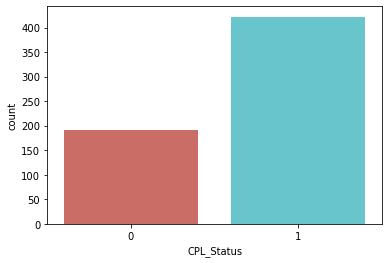

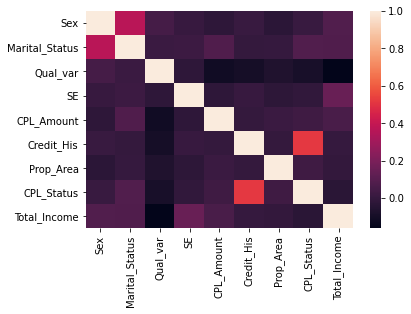

In [14]:
data.CPL_Status.value_counts()
sns.countplot(x='CPL_Status',data=data,palette='hls')
plt.show()
sns.heatmap(corr)

Splitting Dataset

In [15]:
from sklearn.model_selection import train_test_split
x=data[['Sex','Marital_Status','CPL_Amount','Credit_His','Prop_Area','Total_Income']]
y=data['CPL_Status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

##  5. KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range=range(1,26)
scores={}
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
print(scores)

{1: 0.6298701298701299, 2: 0.6298701298701299, 3: 0.7987012987012987, 4: 0.7467532467532467, 5: 0.8116883116883117, 6: 0.8051948051948052, 7: 0.8181818181818182, 8: 0.8181818181818182, 9: 0.8246753246753247, 10: 0.8181818181818182, 11: 0.8116883116883117, 12: 0.8116883116883117, 13: 0.8181818181818182, 14: 0.8246753246753247, 15: 0.8246753246753247, 16: 0.8246753246753247, 17: 0.8246753246753247, 18: 0.8246753246753247, 19: 0.8246753246753247, 20: 0.8246753246753247, 21: 0.8246753246753247, 22: 0.8246753246753247, 23: 0.8246753246753247, 24: 0.7987012987012987, 25: 0.8181818181818182}


In [24]:
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=23)

Evaluation of model

In [25]:
from sklearn import metrics
y_pred=knn.predict(x_test)
Confusion_matrix=print(metrics.confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[ 24  22]
 [  5 103]]
Accuracy: 0.8246753246753247
Precision: 0.824
Recall: 0.9537037037037037


ROC curve and AUC score:

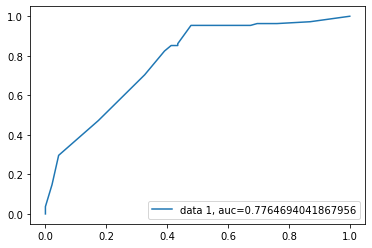

In [26]:
y_pred_proba = knn.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Reading Test Data

In [27]:
test_data=pd.read_excel("C:/Users/parth/Arjun/Project 4/Project - 4 - Test Data.xlsx")
test_data

,Loanapp_ID,Sex,Marital_Status,first_name,last_name,email,address,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,INT_ID,Prev_ID,AGT_ID,Prop_Area
0,CPL001015,M,Y,Dollie,Scafe,dscafe0@is.gd,02 Garrison Pass,0,Grad,N,6864.0,0.0,132.0,360.0,1.0,6869736235,79-489-1539,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6...,Urban
1,CPL001022,M,Y,Kim,Arne,karne9@infoseek.co.jp,6568 Dwight Point,1,Grad,N,3691.2,1800.0,151.2,360.0,1.0,3383749711,75-757-9174,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_2)...,Urban
2,CPL001031,M,Y,Niccolo,Ramble,nramblef@gov.uk,3504 Lukken Park,2,Grad,N,6000.0,2160.0,249.6,360.0,1.0,7247894032,42-085-4345,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Urban
3,CPL001035,M,Y,Rabbi,Haig,rhaigg@tiny.cc,1334 Florence Way,2,Grad,N,2808.0,3055.2,120.0,360.0,NaN,3240492342,10-813-9695,Mozilla/5.0 (X11; Linux i686) AppleWebKit/534....,Urban
4,CPL001051,M,N,Gracie,Winear,gwinearj@devhub.com,9800 Ridge Oak Crossing,0,Non Grad,N,3931.2,0.0,93.6,360.0,1.0,1670564037,20-195-4948,Mozilla/5.0 (Windows NT 6.0) AppleWebKit/534.2...,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,CPL002971,M,Y,Kendall,Stuttman,kstuttmanpc@yolasite.com,463 School Park,3+,Non Grad,Y,4810.8,2132.4,113.0,360.0,1.0,6577741441,06-834-0940,Mozilla/5.0 (X11; Linux i686) AppleWebKit/534....,Urban
363,CPL002975,M,Y,Brianna,Pash,bpashpd@deliciousdays.com,80 Forster Pass,0,Grad,N,4989.6,850.8,115.0,360.0,1.0,9721903779,86-581-4311,Mozilla/5.0 (X11; Linux i686) AppleWebKit/535....,Urban
364,CPL002980,M,N,Beniamino,Dreus,bdreuspg@nydailynews.com,615 Hallows Point,0,Grad,N,3900.0,2391.6,126.0,360.0,NaN,5200766958,15-578-5734,Mozilla/5.0 (X11; CrOS i686 2268.111.0) AppleW...,Semi U
365,CPL002986,M,Y,Judd,Towsie,jtowsieph@altervista.org,85 Arapahoe Street,0,Grad,N,6000.0,2871.6,158.0,360.0,1.0,8258117459,61-064-0986,Mozilla/5.0 (Windows NT 6.0) AppleWebKit/535.1...,Rural


Preprocessing on testing data

In [28]:
test_data=test_data.drop(columns=['Loanapp_ID','first_name','last_name','email','address','CPL_Term','INT_ID','Prev_ID','AGT_ID'])
test_data = test_data.fillna(method='bfill')
LE = LabelEncoder()
test_data['Sex']=LE.fit_transform(test_data['Sex'])
test_data['Marital_Status']=LE.fit_transform(test_data['Marital_Status'])
test_data['Qual_var']=LE.fit_transform(test_data['Qual_var'])
test_data['SE']=LE.fit_transform(test_data['SE'])
test_data['Prop_Area']=LE.fit_transform(test_data['Prop_Area'])
test_data.Dependents[test_data.Dependents == '3+'] = 3
test_data['Total_Income']=test_data['App_Income_1']+test_data['App_Income_2']
test_data=test_data.drop(columns=['App_Income_1','App_Income_2'])

scaler = MinMaxScaler()
def Normalization(Params):
    for i in Params:
        test_data[i]= scaler.fit_transform(pd.DataFrame(test_data[i])) 
Normalization(['Total_Income','CPL_Amount','Prop_Area'])

test_data=test_data.drop(columns=['SE','Qual_var'])

testing_x=test_data[['Sex','Marital_Status','CPL_Amount','Credit_His','Prop_Area','Total_Income']]

<ipython-input-28-0881cc3d1039>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.Dependents[test_data.Dependents == '3+'] = 3


In [29]:
y_prediction=knn.predict(testing_x)
test_data['KNN']=y_prediction

Vissualization of output

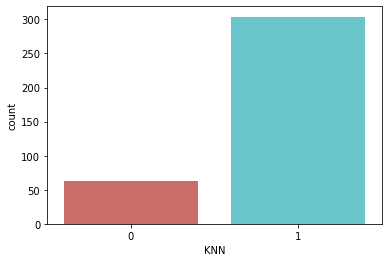

In [33]:
test_data.KNN.value_counts()
sns.countplot(x='KNN',data=test_data,palette='hls')
plt.show()

In [34]:
test_data

,Sex,Marital_Status,Dependents,CPL_Amount,Credit_His,Prop_Area,Total_Income,KNN
0,1,1,0,0.157088,1.0,1.0,0.055957,1
1,1,1,1,0.187739,1.0,1.0,0.039791,1
2,1,1,2,0.344828,1.0,1.0,0.071218,1
3,1,1,2,0.137931,1.0,1.0,0.044172,1
4,1,0,0,0.095785,1.0,1.0,0.021422,1
...,...,...,...,...,...,...,...,...
362,1,1,3,0.126756,1.0,1.0,0.056889,1
363,1,1,0,0.129949,1.0,1.0,0.043903,1
364,1,0,0,0.147510,1.0,0.5,0.049216,1
365,1,1,0,0.198595,1.0,0.0,0.079597,1


In [35]:
test_data.to_csv('knn.csv')